In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
from tqdm.notebook import tqdm
from sqlalchemy import create_engine
import matplotlib.pyplot as plt


In [2]:
# create dynamic data input for web data reader
ticker = "GOOG"
today = date.today()
end_dt = today - relativedelta(months=6)
splitter_dt = end_dt - relativedelta(years=1)
splitter_dt = splitter_dt.replace(month=1, day=1)
begin_dt = end_dt - relativedelta(years=11)
begin_dt = begin_dt.replace(month=1, day=1)
print("Today's date:", today)
print("Begin date:", begin_dt)
print("End date:", end_dt)
print("Data split date:", splitter_dt)

Today's date: 2020-08-15
Begin date: 2009-01-01
End date: 2020-02-15
Data split date: 2019-01-01


In [3]:
#Convert begin and end dates to string input parameter to datareader
enddate = end_dt.strftime("%Y-%m-%d")
startdate = begin_dt.strftime("%Y-%m-%d")
split_dt = splitter_dt.strftime("%Y-%m-%d")
print("enddate =", enddate)
print("start Date =", startdate)
print("File Split Date =", split_dt)

enddate = 2020-02-15
start Date = 2009-01-01
File Split Date = 2019-01-01


In [4]:
StockData_df = web.DataReader(ticker, data_source="yahoo", start=startdate, end=enddate)
StockData_df = StockData_df.reset_index()
StockData_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-01-02,160.309128,152.179596,153.723801,160.060059,7248000.0,160.060059
1,2009-01-05,165.001541,156.911850,159.900650,163.412491,9814500.0,163.412491
2,2009-01-06,169.763687,162.585587,165.868286,166.406265,12898500.0,166.406265
3,2009-01-07,164.837143,158.779861,163.546982,160.403763,9022600.0,160.403763
4,2009-01-08,161.987823,158.077484,158.545731,161.987823,7228300.0,161.987823


In [5]:
StockData_df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
2794,2020-02-10,1509.500000,1474.319946,1474.319946,1508.680054,1419900.0,1508.680054
2795,2020-02-11,1529.630005,1505.637939,1511.810059,1508.790039,1344600.0,1508.790039
2796,2020-02-12,1520.694946,1508.109985,1514.479980,1518.270020,1167600.0,1518.270020
2797,2020-02-13,1527.180054,1504.599976,1512.689941,1514.660034,929500.0,1514.660034
2798,2020-02-14,1520.739990,1507.339966,1515.599976,1520.739990,1196700.0,1520.739990


In [6]:
#Read in stock data from CSV if internet not available
#StockData_df = pd.read_csv("Data/stock_prices_latest.csv", index_col = "date",parse_dates=True)
#StockData_df['date'] = StockData_df['date'].astype('datetime64[ns]')
#StockData_df = StockData_df.sort_values(by=['date'])
#StockData_df.head()

In [7]:
StockData_df.isna().any()

Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [8]:
StockData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2799 non-null   datetime64[ns]
 1   High       2799 non-null   float64       
 2   Low        2799 non-null   float64       
 3   Open       2799 non-null   float64       
 4   Close      2799 non-null   float64       
 5   Volume     2799 non-null   float64       
 6   Adj Close  2799 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 153.2 KB


In [9]:
StockData_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2799.000000,2799.000000,2799.000000,2799.000000,2.799000e+03,2799.000000
mean,619.702291,609.191825,614.514403,614.640066,3.619086e+06,614.640066
std,346.421983,340.874139,343.490293,343.840544,2.997955e+06,343.840544
min,149.190796,140.847076,143.636612,140.847076,7.900000e+03,140.847076
25%,302.366669,297.255814,299.537262,299.405258,1.470400e+06,299.405258
50%,542.919434,535.090881,538.869995,539.179993,2.657200e+06,539.179993
75%,915.477509,904.200012,908.409973,907.984985,4.827500e+06,907.984985
max,1529.630005,1508.109985,1515.599976,1520.739990,2.976060e+07,1520.739990


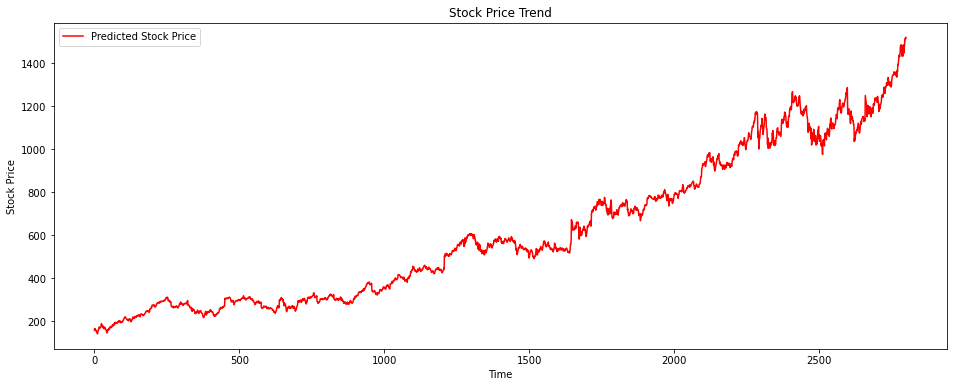

In [10]:
#visualizing the output
plt.figure(figsize=(16,6))
#plt.plot(Stock_Price_Viz['Date'],color = 'green', label = 'Actual stock Price')
plt.plot(StockData_df['Close'], color = 'red', label = 'Predicted Stock Price')
#plt.plot(StockData_df['Open'], color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Trend')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [11]:
#Create training data set
data_training = StockData_df[StockData_df['Date']<split_dt].copy()
data_training 


,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-01-02,160.309128,152.179596,153.723801,160.060059,7248000.0,160.060059
1,2009-01-05,165.001541,156.911850,159.900650,163.412491,9814500.0,163.412491
2,2009-01-06,169.763687,162.585587,165.868286,166.406265,12898500.0,166.406265
3,2009-01-07,164.837143,158.779861,163.546982,160.403763,9022600.0,160.403763
4,2009-01-08,161.987823,158.077484,158.545731,161.987823,7228300.0,161.987823
...,...,...,...,...,...,...,...
2511,2018-12-24,1003.539978,970.109985,973.900024,976.219971,1590300.0,976.219971
2512,2018-12-26,1040.000000,983.000000,989.010010,1039.459961,2373300.0,1039.459961
2513,2018-12-27,1043.890015,997.000000,1017.150024,1043.880005,2109800.0,1043.880005
2514,2018-12-28,1055.560059,1033.099976,1049.619995,1037.079956,1414800.0,1037.079956


In [12]:
#Create Test data set
data_test = StockData_df[StockData_df['Date']>=split_dt].copy()
data_test 

,Date,High,Low,Open,Close,Volume,Adj Close
2516,2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600.0,1045.849976
2517,2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100.0,1016.059998
2518,2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900.0,1070.709961
2519,2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900.0,1068.390015
2520,2019-01-08,1084.560059,1060.530029,1076.109985,1076.280029,1764900.0,1076.280029
...,...,...,...,...,...,...,...
2794,2020-02-10,1509.500000,1474.319946,1474.319946,1508.680054,1419900.0,1508.680054
2795,2020-02-11,1529.630005,1505.637939,1511.810059,1508.790039,1344600.0,1508.790039
2796,2020-02-12,1520.694946,1508.109985,1514.479980,1518.270020,1167600.0,1518.270020
2797,2020-02-13,1527.180054,1504.599976,1512.689941,1514.660034,929500.0,1514.660034


In [13]:
training_data = data_training.drop(['Date','Adj Close'], axis = 1)
training_data

,High,Low,Open,Close,Volume
0,160.309128,152.179596,153.723801,160.060059,7248000.0
1,165.001541,156.911850,159.900650,163.412491,9814500.0
2,169.763687,162.585587,165.868286,166.406265,12898500.0
3,164.837143,158.779861,163.546982,160.403763,9022600.0
4,161.987823,158.077484,158.545731,161.987823,7228300.0
...,...,...,...,...,...
2511,1003.539978,970.109985,973.900024,976.219971,1590300.0
2512,1040.000000,983.000000,989.010010,1039.459961,2373300.0
2513,1043.890015,997.000000,1017.150024,1043.880005,2109800.0
2514,1055.560059,1033.099976,1049.619995,1037.079956,1414800.0


In [14]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.0098856 , 0.01022631, 0.00894759, 0.0170406 , 0.24334262],
       [0.01405775, 0.01449663, 0.01442662, 0.02001398, 0.3296037 ],
       [0.0182919 , 0.01961653, 0.01972006, 0.02266925, 0.43325816],
       ...,
       [0.79550088, 0.77258061, 0.77482861, 0.80092828, 0.07064569],
       [0.80587703, 0.80515673, 0.8036303 , 0.79489711, 0.04728646],
       [0.80333403, 0.79657508, 0.80481889, 0.79359334, 0.04992488]])

In [15]:
X_train = []
y_train = []

In [16]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])

In [17]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train.shape, y_train.shape

((2456, 60, 5), (2456,))

Building Neural Network: LSTM

In [19]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5145818165197263236
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7005965517
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10065179945251885198
physical_device_desc: "device: 0, name: GeForce RTX 2080, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [20]:
from tensorflow.python.client import device_lib
import tensorflow as tf
# tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)
tf.config.experimental.set_visible_devices(tf.config.experimental.list_physical_devices('GPU'), 'GPU')
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [21]:
# Initialising the RNN
regressor = Sequential()

In [22]:
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [23]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)              

In [24]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [39]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
2456/2456 [==============================] - 11s 4ms/step - loss: 8.1931e-04
Epoch 2/100
2456/2456 [==============================] - 11s 5ms/step - loss: 9.2735e-04
Epoch 3/100
2456/2456 [==============================] - 11s 4ms/step - loss: 9.3204e-04
Epoch 4/100
2456/2456 [==============================] - 11s 5ms/step - loss: 9.4481e-04
Epoch 5/100
2456/2456 [==============================] - 11s 4ms/step - loss: 9.2413e-04
Epoch 6/100
2456/2456 [==============================] - 11s 4ms/step - loss: 8.7732e-04
Epoch 7/100
2456/2456 [==============================] - 11s 4ms/step - loss: 8.0777e-04
Epoch 8/100
2456/2456 [==============================] - 11s 5ms/step - loss: 7.9607e-04
Epoch 9/100
2456/2456 [==============================] - 11s 4ms/step - loss: 8.6010e-04
Epoch 10/100
2456/2456 [==============================] - 11s 4ms/step - loss: 7.6985e-04
Epoch 11/100
2456/2456 [==============================] - 11s 4ms/step - loss: 9.1416e-04
Epoch 12/100
2456/2

Prepare Test data

In [26]:
data_training.tail(60)

,Date,High,Low,Open,Close,Volume,Adj Close
2456,2018-10-04,1197.510010,1155.576050,1195.329956,1168.189941,2209500.0,1168.189941
2457,2018-10-05,1173.500000,1145.119995,1167.500000,1157.349976,1184300.0,1157.349976
2458,2018-10-08,1168.000000,1127.364014,1150.109985,1148.969971,1932400.0,1148.969971
2459,2018-10-09,1154.349976,1137.572021,1146.150024,1138.819946,1308700.0,1138.819946
2460,2018-10-10,1132.170044,1081.130005,1131.079956,1081.219971,2675700.0,1081.219971
2461,2018-10-11,1106.400024,1068.270020,1072.939941,1079.319946,2949000.0,1079.319946
2462,2018-10-12,1115.000000,1086.401978,1108.000000,1110.079956,2101300.0,1110.079956
2463,2018-10-15,1113.446045,1089.000000,1108.910034,1092.250000,1372400.0,1092.250000
2464,2018-10-16,1124.219971,1102.500000,1104.589966,1121.280029,1928500.0,1121.280029
2465,2018-10-17,1128.989990,1102.189941,1126.459961,1115.689941,1467200.0,1115.689941


In [27]:
#Capturing last 60 daysof training to tack onto test data set
past_60_days = data_training.tail(60)

In [28]:
#Preparing test data set
predict_df = past_60_days.append(data_test,ignore_index = True)
predict_df = predict_df.drop(['Date','Adj Close'], axis=1)
predict_df.head()                            

,High,Low,Open,Close,Volume
0,1197.510010,1155.576050,1195.329956,1168.189941,2209500.0
1,1173.500000,1145.119995,1167.500000,1157.349976,1184300.0
2,1168.000000,1127.364014,1150.109985,1148.969971,1932400.0
3,1154.349976,1137.572021,1146.150024,1138.819946,1308700.0
4,1132.170044,1081.130005,1131.079956,1081.219971,2675700.0


In [29]:
#fitting data set
inputs = scaler.transform(predict_df)
inputs

array([[0.93208851, 0.91567745, 0.93287875, 0.91118267, 0.07399665],
       [0.91074057, 0.90624205, 0.90819287, 0.90156837, 0.03953927],
       [0.90585037, 0.8902193 , 0.89276748, 0.89413588, 0.06468321],
       ...,
       [1.21944083, 1.23379922, 1.21597294, 1.2216797 , 0.03897798],
       [1.22520691, 1.23063183, 1.21438513, 1.21847789, 0.03097534],
       [1.21948088, 1.23310436, 1.2169664 , 1.22387039, 0.03995604]])

In [30]:
X_test = []
y_test = []

In [31]:
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])    

In [32]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((283, 60, 5), (283,))

In [33]:
y_pred = regressor.predict(X_test)
y_pred

array([[0.7568711 ],
       [0.75723016],
       [0.75821805],
       [0.75968766],
       [0.76181865],
       [0.76473033],
       [0.76838887],
       [0.7722833 ],
       [0.7758064 ],
       [0.7785665 ],
       [0.78071594],
       [0.78283346],
       [0.7852098 ],
       [0.7880578 ],
       [0.790902  ],
       [0.79348314],
       [0.795586  ],
       [0.7975179 ],
       [0.79908824],
       [0.8001163 ],
       [0.80085397],
       [0.80205286],
       [0.80409205],
       [0.8068874 ],
       [0.8101448 ],
       [0.81362283],
       [0.8164768 ],
       [0.8184434 ],
       [0.81965005],
       [0.8205768 ],
       [0.8218111 ],
       [0.823437  ],
       [0.8252667 ],
       [0.8270867 ],
       [0.82872415],
       [0.8297719 ],
       [0.83027935],
       [0.83051467],
       [0.83059764],
       [0.8307154 ],
       [0.83100545],
       [0.83183503],
       [0.8334646 ],
       [0.8361126 ],
       [0.83965766],
       [0.8432828 ],
       [0.8462002 ],
       [0.848

In [34]:
scaler.scale_

array([8.89126607e-04, 9.02386226e-04, 8.87025435e-04, 8.86931428e-04,
       3.36103950e-08])

In [35]:
#Scaler inverter 
scale =1/scaler.scale_[0]
scale

1124.69921875

In [36]:
y_pred = y_pred*scale
y_test = y_test*scale

In [37]:
y_pred

array([[ 851.2523 ],
       [ 851.6562 ],
       [ 852.7673 ],
       [ 854.4201 ],
       [ 856.81683],
       [ 860.0916 ],
       [ 864.20636],
       [ 868.5864 ],
       [ 872.5489 ],
       [ 875.65314],
       [ 878.0706 ],
       [ 880.45215],
       [ 883.1248 ],
       [ 886.328  ],
       [ 889.52686],
       [ 892.4299 ],
       [ 894.7949 ],
       [ 896.9678 ],
       [ 898.73395],
       [ 899.8902 ],
       [ 900.71985],
       [ 902.06824],
       [ 904.3617 ],
       [ 907.5056 ],
       [ 911.1692 ],
       [ 915.081  ],
       [ 918.29083],
       [ 920.5027 ],
       [ 921.8598 ],
       [ 922.9021 ],
       [ 924.2903 ],
       [ 926.1189 ],
       [ 928.1768 ],
       [ 930.22375],
       [ 932.0654 ],
       [ 933.2438 ],
       [ 933.8145 ],
       [ 934.0792 ],
       [ 934.1725 ],
       [ 934.305  ],
       [ 934.63116],
       [ 935.5642 ],
       [ 937.39703],
       [ 940.3752 ],
       [ 944.3623 ],
       [ 948.4395 ],
       [ 951.72076],
       [ 954.

Visualize output

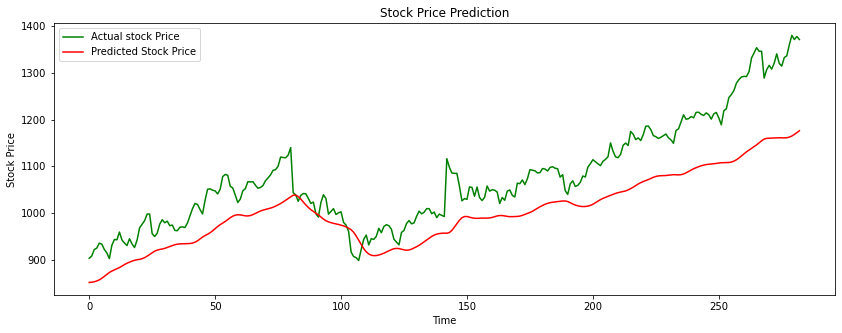

In [38]:
#visualizing the output
plt.figure(figsize=(14,5))
plt.plot(y_test,color = 'green', label = 'Actual stock Price')
plt.plot(y_pred, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()